In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix
import seaborn as sns

In [96]:
churn_df = pd.read_csv('/content/churn-bigml-20.csv')

In [97]:
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [98]:
churn_df.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [99]:
# Converting 'Churn' to binary (1 for True, 0 for False)
churn_df['Churn'] = churn_df['Churn'].astype(int)

# Encoding categorical variables
# Binary encode 'International plan' and 'Voice mail plan' (Yes/No)
churn_df['International plan'] = churn_df['International plan'].map({'Yes': 1, 'No': 0})
churn_df['Voice mail plan'] = churn_df['Voice mail plan'].map({'Yes': 1, 'No': 0})

# One-hot encode 'State'
churn_df = pd.get_dummies(churn_df, columns=['State'], drop_first=True)

# Dropping 'Area code' as it may not be relevant in the prediction of churn
churn_df = churn_df.drop('Area code', axis=1)

In [100]:
churn_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,...,False,False,False,False,False,False,False,False,False,False
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,...,False,False,False,False,False,False,False,False,False,False
2,161,0,0,0,332.9,67,56.59,317.8,97,27.01,...,False,False,False,False,False,False,False,False,False,False
3,111,0,0,0,110.4,103,18.77,137.3,102,11.67,...,False,False,False,False,False,False,False,False,False,False
4,49,0,0,0,119.3,117,20.28,215.1,109,18.28,...,False,False,False,False,False,False,False,False,False,False


In [101]:
x = churn_df.drop('Churn', axis=1)
y = churn_df['Churn']

Data Standardization

In [102]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)

In [103]:
print(standardized_data)

[[ 0.34712707 -0.29380132 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]
 [-0.92773053 -0.29380132 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]
 [ 1.42585272 -0.29380132 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]
 ...
 [-1.05031299 -0.29380132 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]
 [ 1.37681974 -0.29380132 -0.6288064  ... -0.16172151  6.00462784
  -0.12949244]
 [ 1.98973205  3.40366063 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]]


In [104]:
x = standardized_data
y = churn_df['Churn']

In [105]:
print(x)
print(y)

[[ 0.34712707 -0.29380132 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]
 [-0.92773053 -0.29380132 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]
 [ 1.42585272 -0.29380132 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]
 ...
 [-1.05031299 -0.29380132 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]
 [ 1.37681974 -0.29380132 -0.6288064  ... -0.16172151  6.00462784
  -0.12949244]
 [ 1.98973205  3.40366063 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]]
0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64


#Training and Test Split

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=7)

In [107]:
print(x.shape, x_train.shape, x_test.shape)

(667, 67) (533, 67) (134, 67)


In [108]:
lr = LogisticRegression(class_weight= 'balanced')
lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [109]:
y_pred = lr.predict(x_test)

Accuracy: 0.7313
Precision: 0.2927
Recall: 0.6316
F1-Score: 0.4000
ROC-AUC: 0.7474
Precision-Recall AUC: 0.3336


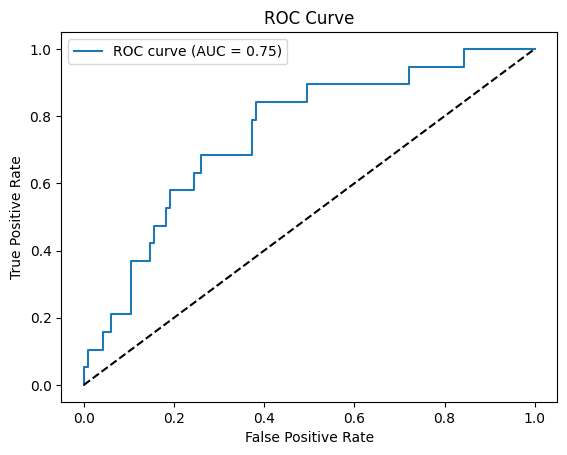

In [110]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Compute ROC curve and AUC
y_prob = lr.predict_proba(x_test)[:, 1]  # Probability of positive class (churn)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Calculate ROC-AUC
y_prob = lr.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#Using Cross Validation

In [116]:
lr = LogisticRegression(class_weight= 'balanced')
cv_score = cross_val_score(lr, x, y, cv=5, scoring='accuracy')

# Define stratified k-fold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform 5-fold cross-validation
cv_results = cross_validate(lr, x, y, cv=skf, scoring=scoring, return_train_score=False)

# Print the cross-validation results
print("Basic Logistic Regression (5-Fold Stratified Cross-Validation):")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std() * 2:.4f})")
print(f"Precision: {cv_results['test_precision'].mean():.4f} (+/- {cv_results['test_precision'].std() * 2:.4f})")
print(f"Recall: {cv_results['test_recall'].mean():.4f} (+/- {cv_results['test_recall'].std() * 2:.4f})")
print(f"F1-Score: {cv_results['test_f1'].mean():.4f} (+/- {cv_results['test_f1'].std() * 2:.4f})")
print(f"ROC-AUC: {cv_results['test_roc_auc'].mean():.4f} (+/- {cv_results['test_roc_auc'].std() * 2:.4f})")
mean_accuracy_lr = sum(cv_score)/len(cv_score)
mean_accuracy_lr = mean_accuracy_lr*100

print('Mean Accuracy for Logistic Regression =', mean_accuracy_lr)

Basic Logistic Regression (5-Fold Stratified Cross-Validation):
Accuracy: 0.7436 (+/- 0.0745)
Precision: 0.2993 (+/- 0.1054)
Recall: 0.5789 (+/- 0.1761)
F1-Score: 0.3928 (+/- 0.1186)
ROC-AUC: 0.7174 (+/- 0.0700)
Mean Accuracy for Logistic Regression = 74.36426888115813


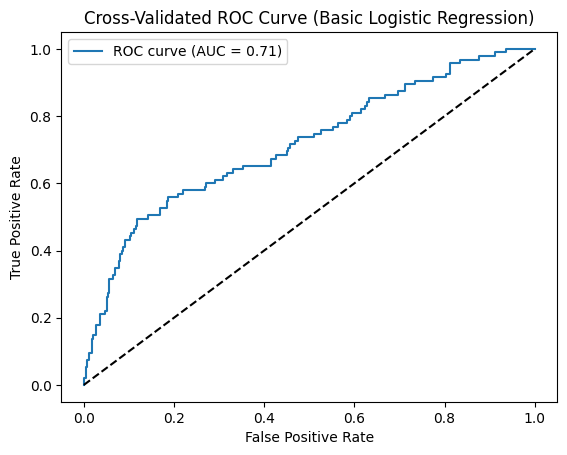

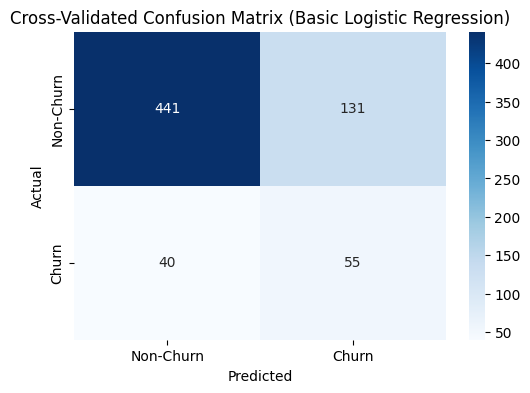

In [117]:
# Get cross-validated predictions for ROC curve (predicted probabilities)
y_prob_cv = cross_val_predict(lr, x, y, cv=skf, method='predict_proba')[:, 1]

# Get cross-validated predictions for confusion matrix (predicted labels)
y_pred_cv = cross_val_predict(lr, x, y, cv=skf, method='predict')

# Plot ROC curve (cross-validated)
fpr, tpr, _ = roc_curve(y, y_prob_cv)
roc_auc = roc_auc_score(y, y_prob_cv)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validated ROC Curve (Basic Logistic Regression)')
plt.legend(loc='best')
plt.show()

# Plot confusion matrix (cross-validated)
cm = confusion_matrix(y, y_pred_cv)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Cross-Validated Confusion Matrix (Basic Logistic Regression)')
plt.show()